# Computer Vision - Laboratory

## Practicum 1: Basics on Image Processing and Manipulation

The main topics are:
1. Image loading, saving and creation
2. Color manipulation 

In order to complete this practicum, we will work with the following concepts: image creation, data types, image manipulation.

### Packages loading 

First we need to import the required Python packages for basic image manipulation. 

Run the following code:

In [1]:
import numpy as np # useful for manipulating matrices
from skimage import io # useful for image loading and saving
from matplotlib import pyplot as plt # useful for plotting images on iPython or Jupyter Notebooks

Note that commands starting with the percentage sign (`%`) are special internal commands to ipython (as opposed to Python code to be run). In the case below, we set the matplotlib environment to display images results inline (i.e. the images will be shown **inside the 
notebook**):

In [2]:
%matplotlib inline

### 1.1 Image creation

Remember that [Numpy](https://docs.scipy.org/doc/numpy-1.13.0/reference/) allows us to define images of different kinds treating them as matrices.

The most common examples are:

* Binary: with values of 0 or 1, interpreted as black or white, respectively.
* Grayscale: with possible data types uint8, uint16, double, whose pixel values define their intensity.
* RGB Image: color images consisting of 3 matrices (usually called 'channels'), which contain intensity values for each color separately R (red), G (green) and B (blue).


a) Create and display a grayscale image that has 150 rows and 200 columns where each value should be of type unsigned integer with 8 bits. 

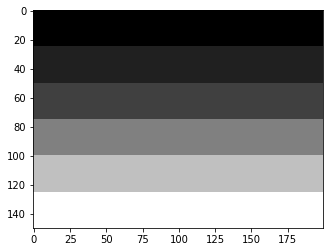

In [3]:
# We create a matrix with 150 rows and 200 columns
image = np.zeros((150,200), dtype=np.uint8)

# Personalizing the grayscale image
image[25:,] = 25
image[50:,] = 50
image[75:,] = 100
image[100:,] = 150
image[125:,] = 200

# Display image
plt.imshow(image, cmap='gray')
plt.show()

How many values can each pixel have in this case? 

##### Answer: Each pixel can have 256 values, from 0 (black) to 255 (white).

b) Change the color of the pixels of the image in such a way that the left half is black (0) and the right half is white (255). 

Visualize the image and print the values of its first row.

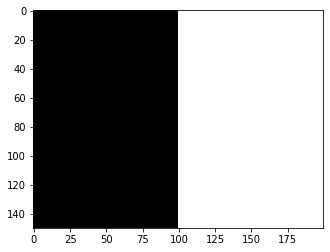

In [4]:
# We create a matrix with 150 rows and 200 columns
image = np.zeros((150,200), dtype=np.uint8)

# We divide the number of columns in half
n = int(image.shape[1]/2)

# Paint to white the right half
image[:,n:] = 255

# Display image
plt.imshow(image, cmap='gray')
plt.show()

### 1.2 Image saving and loading

a) Use the IO image package to save the image previously created:

In [5]:
# We save the 'image' we created before intro the dir we have below
io.imsave('images/black_and_white_image.bmp', image)

b) Load the saved image and visualize it:

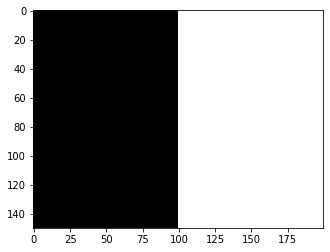

In [6]:
# We load the image we saved before from the same dir
img = io.imread('images/black_and_white_image.bmp')

# Display image
plt.imshow(img, cmap='gray')
plt.show()

### 1.3 Color image manipulation

a) Load and show the image `lenna.jpg`, and check its dimensions.

**Note:** Pictures may appear in the figure with pseudocolors. Use (imread,im,cmap='rgb') to display them in RGB color and (imread,im,cmap='gray') to display them in grayscale. For more information, check the color maps available in the documentation.

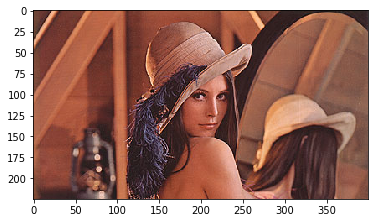

Dimentions:  400 x 225


In [7]:
# First of all, we load the image lenna.jpg
lenna_img = io.imread('images/images/lenna.jpg')

# Display image
plt.imshow(lenna_img)
plt.show()

# Print dimentions
print("Dimentions: ", lenna_img.shape[1], "x", lenna_img.shape[0])

b) Convert the previous image to grayscale, visualize and save it. Moreover, show both images (RGB & greyscale) details such as shape, dtype, max and min values.

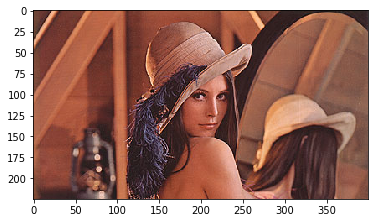

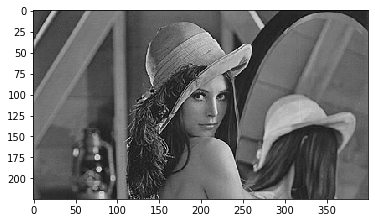

--------- Details RGB ---------

Shape: (225, 400, 3)
Dtype: uint8
Max: 255
Min: 0
--------- Details greyscale ---------

Shape: (225, 400)
Dtype: uint8
Max: 249
Min: 1


In [8]:
# We get the number of rows and columns of the original image
n_rows = int(lenna_img.shape[0])
n_cols = int(lenna_img.shape[1])

# Create a new matrix with the number of rows and columns we got
lenna_img_bw = np.zeros((n_rows,n_cols), dtype=np.uint8)

# We get the mean of the 3 values rgb for each pixel; and put the value in the black and white matrix we created
# since the grayscale image has a value from 0 to 255 in each pixel instead of the rgb channels
for i in range(n_rows):
    for j in range(n_cols):
        sum_channels_value = 0
        for k in range(3): #3 channels: r,g,b
            v = lenna_img[i][j][k]
            sum_channels_value += v
        
        value = int(sum_channels_value/3) #Since I am using as dtype=uint8 I need a integer value not a float
        lenna_img_bw[i][j] = value

# Display original image
plt.imshow(lenna_img)
plt.show()

# Display black and white image
plt.imshow(lenna_img_bw, cmap='gray')
plt.show()

# Save black and white image
io.imsave('images/lenna_black_and_white.jpg', lenna_img_bw)

# Print details of the original image
print("--------- Details RGB ---------\n")
print("Shape: " + str(lenna_img.shape))
print("Dtype: " + str(lenna_img.dtype))
print("Max: " + str(lenna_img.max()))
print("Min: " + str(lenna_img.min()))

# Print details of the black and white image
print("--------- Details greyscale ---------\n")
print("Shape: " + str(lenna_img_bw.shape))
print("Dtype: " + str(lenna_img_bw.dtype))
print("Max: " + str(lenna_img_bw.max()))
print("Min: " + str(lenna_img_bw.min()))

c) Convert the lena image into a boolean image, by applying a binarization to the grayscale image. This should be done by setting to 0 all values equal or below 100 and to 1 otherwise. Check the range of the values of the image, and print the 10th row.

In [9]:
# We get the rows and columns of the black and white image we created before
n_rows = int(lenna_img_bw.shape[0])
n_cols = int(lenna_img_bw.shape[1])

# We create a new matrix
lenna_img_bin = np.zeros((n_rows, n_cols), dtype=np.uint8)

# We set the value to 0 if the pixel in the grayscale image is equal or below to 100, and 1 otherwise
for i in range(n_rows):
    for j in range(n_cols):
        if lenna_img_bw[i][j] <= 100:
            lenna_img_bin[i][j] = 0
        else:
            lenna_img_bin[i][j] = 1

# Print the 10th row
print(lenna_img_bin[9])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


d) Visualize in the same figure three images: (1) the original image, (2) the graylevel image, and (3) the binarized image. Set the corresponding titles of the images.

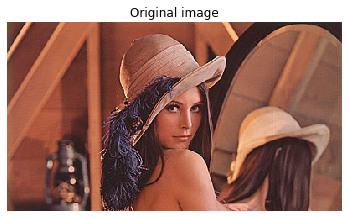

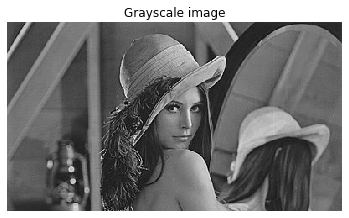

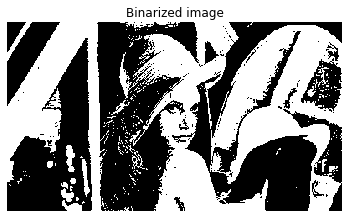

In [10]:
# Display the original image
plt.axis('off')
plt.title("Original image")
plt.imshow(lenna_img)
plt.show()

# Display the grayscale image
plt.axis('off')
plt.title("Grayscale image")
plt.imshow(lenna_img_bw, cmap='gray')
plt.show()

# Display the binarized image
plt.axis('off')
plt.title("Binarized image")
plt.imshow(lenna_img_bin, cmap='gray')
plt.show()

### 1.4 Images manipulation

a) Add a black frame to Lenna's image. It should have a width of 1/10th of the height of the original image. We recommend to create a bigger black image to later embed the original image in the central part.

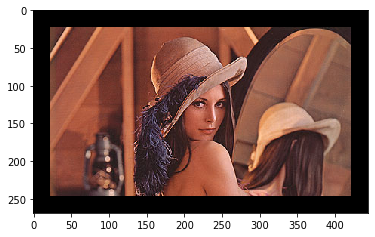

In [11]:
# First we get the value of 'width'
width = int(0.1 * lenna_img.shape[0])

# We create a new matrix with the rows and columns of the original image and add an extra margin to each one
framed_img = np.zeros((int(lenna_img.shape[0]) + 2 * width, int(lenna_img.shape[1]) + 2 * width,
                       lenna_img.shape[2]), dtype=np.uint8)

# We get the number of rows and columns which contains the original image
n_rows = framed_img.shape[0] - width
n_cols = framed_img.shape[1] - width

# Since for now we have a full black image, we add the original image into the framed_img, considering the width
# as the margin
for i in range(width, n_rows):
    for j in range(width, n_cols):
        framed_img[i][j] = lenna_img[i - width][j - width]

# Display the framed image
plt.imshow(framed_img)
plt.show()

b) Change the mask of the framed image to red. Visualize the three images with their respective titles.

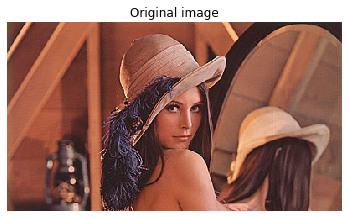

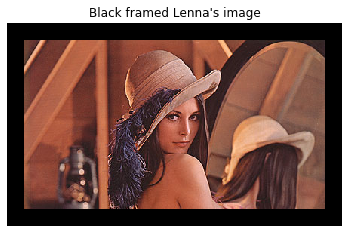

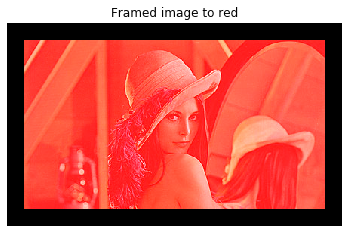

In [12]:
# Copying the framed image in order not to modify the one we created before
red_framed_img = framed_img.copy()

# We get the number of rows and columns of the framed image
n_rows = int(red_framed_img.shape[0])
n_cols = int(red_framed_img.shape[1])

# We add the red filter only to the image without changing the colour of the margins
red_framed_img[width:n_rows-width,width:n_cols-width,0] = 255

# Display original image
plt.axis('off')
plt.title("Original image")
plt.imshow(lenna_img)
plt.show()

# Display framed image
plt.axis('off')
plt.title("Black framed Lenna's image")
plt.imshow(framed_img)
plt.show()

# Display the framed image with a red filter
plt.axis('off')
plt.title("Framed image to red")
plt.imshow(red_framed_img)
plt.show()

### 1.5 Contrast enhancement

a) Open the image `car_lowContrast.jpg` and visualize it without graylevel enhancement. To this purpose, check which are the minimal and maximal values and how to use the command imshow without contrast enhancement.

Note: When running the function `imshow()` the image is authomatically enhanced. Use the `vmin` and `vmax` parameters in order to deactivate the enhancement applied by default.

Minimal value: 63
Maximal value: 193


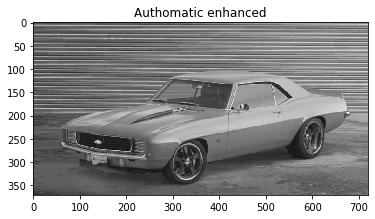

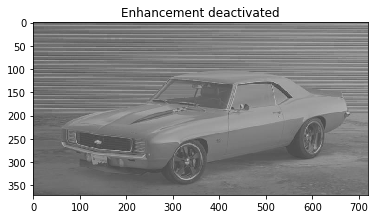

In [13]:
# Load car_lowContrast.jpg 
car_img = io.imread('images/images/car_lowContrast.jpg')

# Print min and max values of the authomatic enhanced
print("Minimal value: " + str(car_img.min()))
print("Maximal value: " + str(car_img.max()))

# Display image with automathic enhanced
plt.title("Authomatic enhanced")
plt.imshow(car_img, cmap="gray")
plt.show()

# Display image with enhancement deactivated
plt.title("Enhancement deactivated")
plt.imshow(car_img, cmap="gray", vmin=0, vmax=255)
plt.show()

b) Create an image called `dark_image` using the  values from the original one, so that the minimal value of the new image is 0. Check the minimal and maximal values of the new image, and compare them with the previous one.

Minimal value: 0
Maximal value: 130


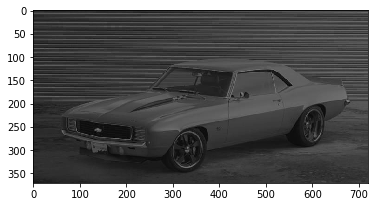

In [14]:
# Get min value of the original image
min_value = car_img.min()

# Copy the image to not make unnecessary changes to the original image
dark_image = car_img.copy()

# Sub all the values in order to make the minimal value of the new image equal to 0
dark_image -= min_value

# Print new min and max values
print("Minimal value: " + str(dark_image.min()))
print("Maximal value: " + str(dark_image.max()))

# Display image
plt.imshow(dark_image, cmap="gray", vmin=0, vmax=255)
plt.show()

c) Create a new image called `bright_im` from the original one, so that the maximal value of the new image is 255. Check the minimal and maximal values of the new image, and compare them with the previous one.

Minimal value: 125
Maximal value: 255


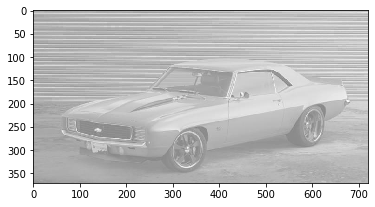

In [15]:
# Get the max_value to add later in the new image
max_value = 255 - car_img.max()

# Copy the original image
bright_im = car_img.copy()

# Add to all values the max_value we got before
bright_im += max_value

# Print new min and max values
print("Minimal value: " + str(bright_im.min()))
print("Maximal value: " + str(bright_im.max()))

# Display images
plt.imshow(bright_im, cmap="gray", vmin=0, vmax=255)
plt.show()

d) Apply contrast enhancement to the original image. There are two ways for it: (1) by direct manipulation, and (2) through scikit-image command. Check the minimal and maximal values of the enhanced image, and compare them with the previous one. 

Implement the contrast enhancement using the two different available methods.

Minimal value: 0.0
Maximal value: 255.0


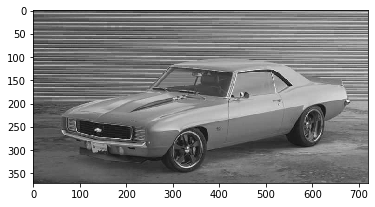

In [16]:
""" Method (1) by direct manipulation """

# Copy the original image
car_contrasted = car_img.copy()

# Get min and max values
min_value = car_img.min()
max_value = car_img.max()

# Applying contrast enhancement by direct manipulation
car_contrasted = (car_contrasted - min_value) / (max_value - min_value) * 255

# Print new min and max values
print("Minimal value: " + str(car_contrasted.min()))
print("Maximal value: " + str(car_contrasted.max()))

# Display image
plt.imshow(car_contrasted, cmap='gray')
plt.show()

Minimal value: 0
Maximal value: 255


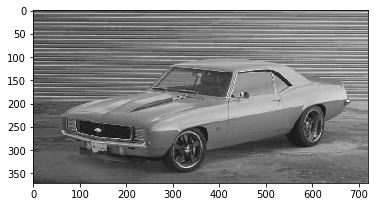

In [17]:
from skimage import exposure

""" Method (2) through scikit-image command """

# Copy image
car_contrasted_2 = car_img.copy()

# Applying the function we obtain the rescaled image with contrast enhancement
car_contrasted_2 = exposure.rescale_intensity(car_contrasted_2, in_range=(63,193)) 

# Print new min and max values
print("Minimal value: " + str(car_contrasted_2.min()))
print("Maximal value: " + str(car_contrasted_2.max()))

# Display image
plt.imshow(car_contrasted_2, cmap='gray')
plt.show()

e) Visualize the 5 images in the same figure, each one with its corresponding title.

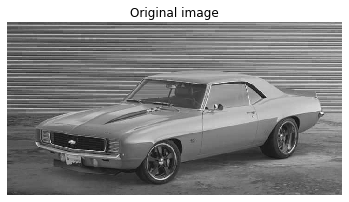

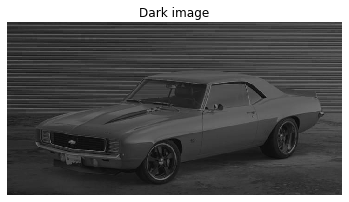

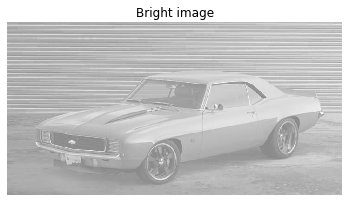

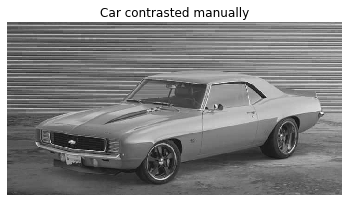

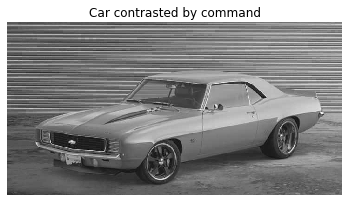

In [18]:
# Display original image
plt.axis('off')
plt.title("Original image")
plt.imshow(car_img, cmap="gray")
plt.show()

# Display dark image
plt.axis('off')
plt.title("Dark image")
plt.imshow(dark_image, cmap="gray", vmin=0, vmax=255)
plt.show()

# Display bright image
plt.axis('off')
plt.title("Bright image")
plt.imshow(bright_im, cmap="gray", vmin=0, vmax=255)
plt.show()

# Display car contrasted manually
plt.axis('off')
plt.title("Car contrasted manually")
plt.imshow(car_contrasted, cmap="gray")
plt.show()

# Display car contrasted through command
plt.axis('off')
plt.title("Car contrasted by command")
plt.imshow(car_contrasted_2, cmap="gray")
plt.show()

### 1.6 Masks and logical image manipulation

Read the image `circles.bmp` (see figure top) and define 3 images in such a way that each one contains only 1 ball (see figure bottom). Visualize the 3 images in the same figure, each one with its corresponding title.

<img src="images_notebook/images_notebook/ex16.png">

**Note:** Be careful when applying `imshow` since it automatically increases the contrast of the image (putting minimum values to 0 and maximal to 1).

**Note:** Be careful when applying type conversion. Check the ranges of the image values.

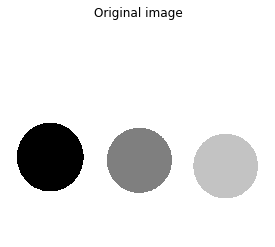

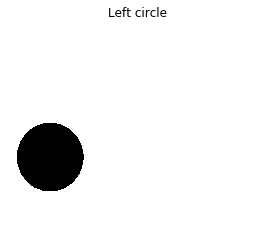

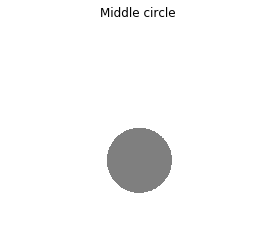

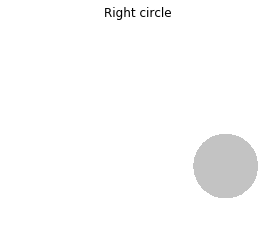

In [19]:
# Load circles image
circles_img = io.imread('images/images/circles.bmp')

# Create a new white image with the same shape
white_img = np.ones(shape = circles_img.shape, dtype = np.uint8) * 255 #We create an auxiliar fully white image 

# Get the min and max values
max_value = circles_img.max()
min_value = circles_img.min()

# Create a mask with all 3 circles
mask = circles_img < circles_img.max()

# Mask for every circle in the image
first_circle = circles_img == min_value
middle_circle = (circles_img > min_value) * (circles_img < circles_img[mask].max())
last_circle = circles_img == circles_img[mask].max()

# Using the previous masks we generate the new images, but first we copy the white image since we will paint only
# one circle
first_circle_img = white_img.copy()
second_circle_img = white_img.copy()
last_circle_img = white_img.copy()

first_circle_img[first_circle] = circles_img[first_circle]
second_circle_img[middle_circle] = circles_img[middle_circle]
last_circle_img[last_circle] = circles_img[last_circle]

# Display original image
plt.axis('off')
plt.title("Original image")
plt.imshow(circles_img, vmin=0, vmax=255)
plt.show()

# Display left circle
plt.axis('off')
plt.title("Left circle")
plt.imshow(first_circle_img, vmin=0, vmax=255)
plt.show()

# Display middle circle
plt.axis('off')
plt.title('Middle circle')
plt.imshow(second_circle_img, vmin=0, vmax=255)
plt.show()

# Display right circle
plt.axis('off')
plt.title('Right circle')
plt.imshow(last_circle_img, vmin=0, vmax=255)
plt.show()


### 1.7 Color manipulation

a) Create and visualize the three images shown in the following figure:
<img src="images_notebook/images_notebook/ex17a.png">

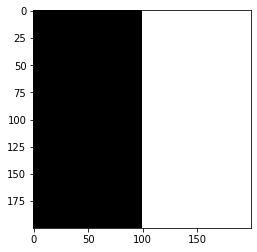

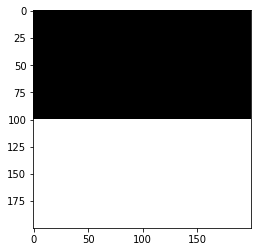

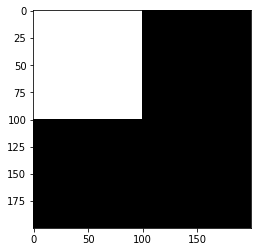

In [20]:
# First we create a matrix for each image
lr_image = np.zeros((200,200), dtype=np.uint8)
up_down_image = np.zeros((200,200), dtype=np.uint8)
a_piece_image = np.zeros((200,200), dtype=np.uint8)

# We get the half number of the columns and colour it white
n = int(lr_image.shape[1]/2)
lr_image[:,n:] = 255
plt.imshow(lr_image, cmap='gray')
plt.show()

# We paint the half number of rows
n = int(up_down_image.shape[0]/2)
up_down_image[n:,:] = 255
plt.imshow(up_down_image, cmap='gray')
plt.show()

# We paint only a quarter of the image
n = int(a_piece_image.shape[0]/2)
a_piece_image[:n,:n] = 255
plt.imshow(a_piece_image, cmap='gray')
plt.show()

b) Using these three images, construct the following color image:
<img src='images_notebook/images_notebook/ex17b.png'>

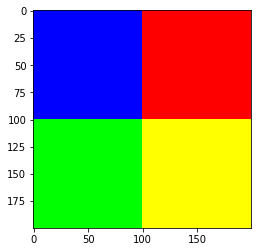

In [21]:
# Determinate the colours we will use 
blue = [0,0,255]
red = [255,0,0]
green = [0,255,0]
yellow = [255,255,0]

# Create a new image
colour_image = np.zeros((200,200,3), dtype=np.uint8)

# Get the half numbers of the columns ( or rows since it have the same number)
n = int(colour_image.shape[1]/2)

# Painting each part of a colour
colour_image[:n,:n] = blue
colour_image[:n,n:] = red
colour_image[n:,:n] = green
colour_image[n:,n:] = yellow

# Display image
plt.imshow(colour_image, cmap='gray')
plt.show()

c) Read and visualize the image `sillas.jpg` (see figure top). Extract its three channels and visualize them in the same figure with their respective titles (see the figure bottom).
<img src="images_notebook/images_notebook/ex17c.png">

<img src="images_notebook/images_notebook/ex17c2.png">

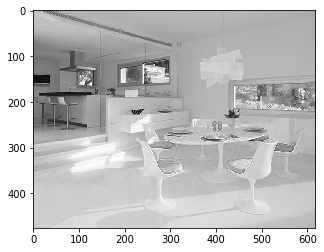

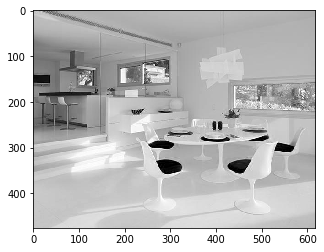

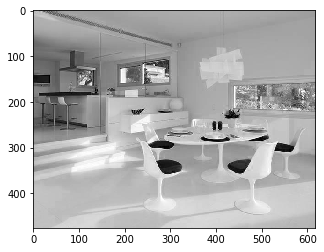

In [22]:
# Load the image
img = io.imread('images/images/sillas.jpg')

# Get number of rows and columns
n_rows = img.shape[0]
n_cols = img.shape[1]

# Create a matrix for each channel
red_channel = np.zeros((n_rows,n_cols), dtype=np.uint8)
green_channel = np.zeros((n_rows,n_cols), dtype=np.uint8)
blue_channel = np.zeros((n_rows,n_cols), dtype=np.uint8)

# Get the respective value of each pixel
for i in range(n_rows):
    for j in range(n_cols):
        red_channel[i][j] = img[i][j][0]
        green_channel[i][j] = img[i][j][1]
        blue_channel[i][j] = img[i][j][2]
        
# Display images
plt.imshow(red_channel, cmap='gray')
plt.show()
plt.imshow(green_channel, cmap='gray')
plt.show()
plt.imshow(blue_channel, cmap='gray')
plt.show()

d) Construct and visualize a new image in which the red color of the chairs is changed to blue (see figure).
<img src="images_notebook/images_notebook/ex17c3.png">

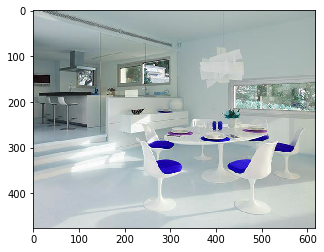

In [23]:
# Load image
img = io.imread('images/images/sillas.jpg')

# Read number of rows and columns
n_rows = img.shape[0]
n_cols = img.shape[1]

# Create a new matrix
blue_image = np.zeros((n_rows,n_cols,3), dtype=np.uint8)

# For each pixel exchanging values between blue and red channels 
for i in range(n_rows):
    for j in range(n_cols):
        new_value_blue = img[i][j][0]
        new_value_red = img[i][j][2]
        img[i][j][2] = new_value_blue
        img[i][j][0] = new_value_red
        blue_image[i][j] = img[i][j]
        
# Display image
plt.imshow(blue_image)
plt.show()

e) Given the images `coat.png` and `model.png` (first two images on the figure below), implement the necessary code to construct the image of the model with the coat (third image). Next find in internet an image with a texture and apply it to obtain an image of the jacket with the found texture (fourth image is only an example).

<img src="images_notebook/images_notebook/ex17d.png">

**Note:** when applying resize, rotate, etc. keep track how the image type and values range change. When necessary, apply type conversion using img_as_float, img_as_uint, img_as_ubyte.

--- model.png data ---
Size: 4348080
Shape: (1188, 915, 4)
Data type: uint8
Pixel 0: [226 226 226 255]

--- coat.png data ---
Size: 4348080
Shape: (1188, 915, 4)
Data type: uint8
Pixel 0: [  0   0   0 255]

--- texture2.png data ---
Size: 3261060
Shape: (1188, 915, 3)
Data type: uint8
Pixel 0: [242  99  87]

--- my_texture.png data ---
Size: 2816352
Shape: (924, 1016, 3)
Data type: uint8
Pixel 0: [224 223 227]

--- coat_model data ---
Size: 4348080
Shape: (1188, 915, 4)
Data type: uint8
Pixel 0: [226 226 226 255]

--- red_texture_img_rgba data ---
Size: 4348080
Shape: (1188, 915, 4)
Data type: uint8
Pixel 0: [242  99  87 255]

--- red_coat_model data ---
Size: 4348080
Shape: (1188, 915, 4)
Data type: uint8
Pixel 0: [226 226 226 255]

--- my_texture_coat_model data ---
Size: 4348080
Shape: (1188, 915, 4)
Data type: uint8
Pixel 0: [226 226 226 255]


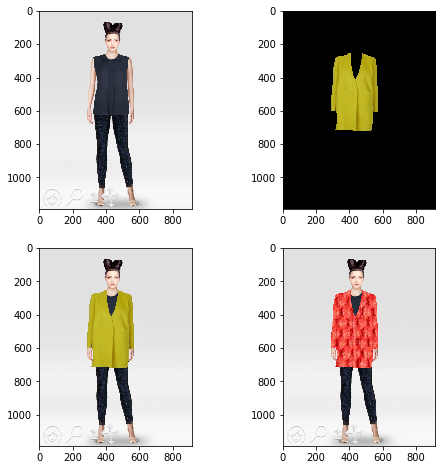

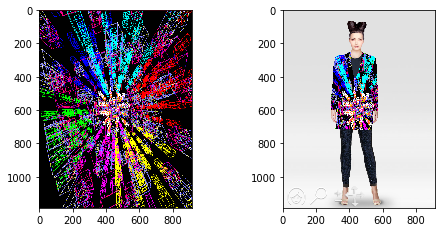

In [27]:
#Your solution
from skimage import img_as_uint # Useful when need to convert the datatype of the image
from skimage.transform import resize # Useful when need to resize an image
model_img = io.imread('images/images/model.png') # Importing model image
coat_img = io.imread('images/images/coat.png') # Importing coat image
red_texture_img = io.imread('images/images/texture2.png') # Importing red texture image
my_texture_img = io.imread('my_texture.png') # Importing my downloaded texture image

# Data info about the model image
print('--- model.png data ---') 
print('Size:', model_img.size)
print('Shape:', model_img.shape)
print('Data type:', model_img.dtype)
print('Pixel 0:', model_img[0, 0])

# Data info about the coat image
print('\n--- coat.png data ---')
print('Size:', coat_img.size)
print('Shape:', coat_img.shape)
print('Data type:', coat_img.dtype)
print('Pixel 0:', coat_img[0, 0])

# Data info about the red texture image
print('\n--- texture2.png data ---')
print('Size:', red_texture_img.size)
print('Shape:', red_texture_img.shape)
print('Data type:', red_texture_img.dtype)
print('Pixel 0:', red_texture_img[0, 0])

# Data info about my downloaded image
print('\n--- my_texture.png data ---')
print('Size:', my_texture_img.size)
print('Shape:', my_texture_img.shape)
print('Data type:', my_texture_img.dtype)
print('Pixel 0:', my_texture_img[0, 0])

# Dressing the model with the coat
# As we can see with the data obtained, both images are the same size, so we can overlay one over another
# In this case, we'll create a new image, using the model image and the coat image
# The coat image is PNG so its pixels values at the 'empty' part of the image are 0
# What we do is to create a new array that'll be the new image of the model with the coat covering her
# The formula is simple, the image will be constructed with the pixels of the coat image if their value are greater than 0
# if they aren't, then the pixels used to fill the image will be the model image ones
coat_model = np.where(coat_img > 0, coat_img, model_img)

# Saving the coat_model image
io.imsave('images/coat_model.png', coat_model)

# Data info about the 'model dressed with the coat' image
print('\n--- coat_model data ---')
print('Size:', coat_model.size)
print('Shape:', coat_model.shape)
print('Data type:', coat_model.dtype)
print('Pixel 0:', coat_model[0, 0])

# The red texture image is RGB type, and not RGBA type, so we can not do the same as before
# So... we need to convert it to RGBA, for that, we create a new array of 0's with the size of the red texture image as RGBA
# We fill the new image (array) with 255 at the alpha and for the red, green and blue we keep the same values of the original texture image
red_texture_img_rgba = np.zeros((red_texture_img.shape[0], red_texture_img.shape[1], 4), dtype='uint8') # We keep the data type as uint8
red_texture_img_rgba = red_texture_img_rgba + 255
red_texture_img_rgba[:,:,:-1] = red_texture_img

# Data info about the red texture image as RGBA
print('\n--- red_texture_img_rgba data ---')
print('Size:', red_texture_img_rgba.size)
print('Shape:', red_texture_img_rgba.shape)
print('Data type:', red_texture_img_rgba.dtype)
print('Pixel 0:', red_texture_img_rgba[0, 0])

# We do the same as we did before when covering the model with the yellow coat
# We create a new image (array) filled with the red texture rgba image pixels if in that coordinates the coat image value is greater than 0
# if not then, fill with the model image pixels
# We are basicly doing the same as before, but not filling pixels with the coat image values, just use the image pixels as a reference
red_coat_model = np.where(coat_img > 0, red_texture_img_rgba, model_img)

# Saving the red_coat_model image
io.imsave('images/red_coat_model.png', red_coat_model)

# Data info about the 'model dressed with the coat with red texture' image
print('\n--- red_coat_model data ---')
print('Size:', red_coat_model.size)
print('Shape:', red_coat_model.shape)
print('Data type:', red_coat_model.dtype)
print('Pixel 0:', red_coat_model[0, 0])

# We are using resize to give the downloaded texture the same size as the model image, we use anti_aliasing set to False
# because we don't want to smooth the image
# Then we do the same we did before with the red_texture_img to give it an alpha channel to the image
my_texture_img_resized = img_as_uint(resize(my_texture_img, (model_img.shape[0], model_img.shape[1]), anti_aliasing=False))
my_texture_img_resized_rgba = np.zeros((my_texture_img_resized.shape[0], my_texture_img_resized.shape[1], 4), dtype='uint8')
my_texture_img_resized_rgba = my_texture_img_resized_rgba + 255
my_texture_img_resized_rgba[:,:,:-1] = my_texture_img_resized

# And now, we can create the new image of the model dressed with the texturized coat (our downloaded texture)
# We do the same as we did to create the red_coat_model, using coat image values and coordinates to fill the new image (array) 
# wether the downloaded texture if pixel value is greater than 0, if not then model image pixel
my_texture_coat_model = np.where(coat_img > 0, my_texture_img_resized_rgba, model_img)

# Saving the my_texture_coat_model image
io.imsave('images/my_texture_coat_model.png', my_texture_coat_model)

# Data info about the 'model dressed with the coat with my downloaded texture' image
print('\n--- my_texture_coat_model data ---')
print('Size:', my_texture_coat_model.size)
print('Shape:', my_texture_coat_model.shape)
print('Data type:', my_texture_coat_model.dtype)
print('Pixel 0:', my_texture_coat_model[0, 0])

# Displaying all the images
fig = plt.figure(figsize=(8,8))
fig.add_subplot(2, 2, 1)
plt.imshow(model_img)
fig.add_subplot(2, 2, 2)
plt.imshow(coat_img)
fig.add_subplot(2, 2, 3)
plt.imshow(coat_model)
fig.add_subplot(2, 2, 4)
plt.imshow(red_coat_model)
fig = plt.figure(figsize=(8,8))
fig.add_subplot(2, 2, 1)
plt.imshow(my_texture_img_resized_rgba)
fig.add_subplot(2, 2, 2)
plt.imshow(my_texture_coat_model)

## Delivery

Compressed file **P1_Student1_Student2.zip** that includes:
- The notebook P1_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.
- The images used that are not provided in P1.zip.

**Deadline (Campus Virtual): October 13, 11:00 p.m.** 